In [164]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Real_Estate.csv.xls")
df = df.drop(columns = ['date'])
df.head()

,age,distance,convenience_stores,latitude,longitude,price
0,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,35.5,274.0144,2,25.012148,121.546990,24.970725
2,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,8.5,967.4000,6,25.011037,121.479946,21.654710


In [165]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(df[['age', 'distance', 'convenience_stores', 'latitude', 'longitude']].values, df.price.values)

LinearRegression()

In [166]:
reg1 = reg.predict([[30, 543, 10, 29, 120]])
print(reg1)

[312.47609402]


In [167]:
x = df[['age', 'distance', 'convenience_stores', 'latitude', 'longitude']]
y = df.price

In [168]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
y_test

325    47.166778
279    31.279347
215    50.628012
22     52.761153
328    41.115051
         ...    
268    39.740178
355    21.182575
16     13.673532
205    32.792724
273     9.617078
Name: price, Length: 125, dtype: float64

In [169]:
reg.fit(x_train, y_train)
reg1 = reg.predict(x_test)
reg1

array([ 31.43624332,  37.41272921,  35.81869651,  36.39040325,
        40.30936314,  42.99558719,  22.4623343 ,   0.6563495 ,
        36.86998555,  47.68063468,  22.04438972,  37.34011054,
        13.90433248,   1.57721961,  21.36573342,  33.45885178,
        20.08748309,  29.71132323,  42.83464843,   9.46379824,
        42.78353475,  30.44718733,  38.1077252 ,  38.40869725,
        18.98887845,  16.62215757,  27.85733787,  30.80973723,
        34.89392405,  18.97030841,  39.99556633,  39.69067999,
        29.99338731,  22.81950029,  28.48856718,   8.08872259,
        16.10962958,  36.01407804,  28.65364209,  30.06800027,
        35.76245583,  36.39560646,  39.61046388,  41.14062741,
        20.57085621,  36.97298241,  27.82452025,   3.4931028 ,
        12.2014273 ,  28.25303131,  17.50638125,  -8.06295791,
        41.66542254,  17.89036892,  42.94022844,  31.52798891,
        28.1661227 ,  42.23022487,  13.96764124,  32.11811165,
        30.14343701,   2.09222358,  30.23603784,  26.06

(array([ 8., 17.,  7., 13., 14., 19., 16., 11., 12.,  8.]),
 array([-22.28093584, -17.99892787, -13.7169199 ,  -9.43491193,
         -5.15290396,  -0.87089598,   3.41111199,   7.69311996,
         11.97512793,  16.2571359 ,  20.53914388]),
 <BarContainer object of 10 artists>)

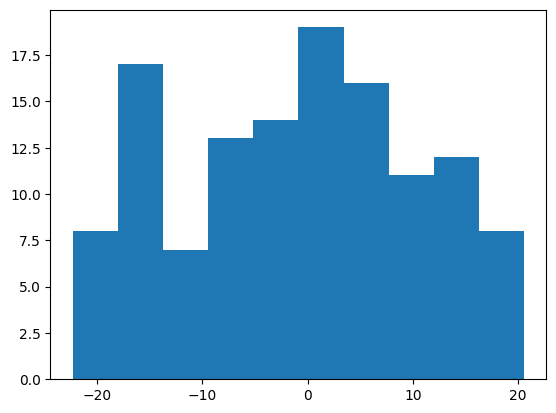

In [170]:
plt.hist(reg1 - y_test)

In [171]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
score1 = r2_score(y_test, reg1)
score2 = mean_absolute_error(y_test, reg1)
score3 = root_mean_squared_error(y_test, reg1)
print(score1)
print(score2)
print(score3)

0.4568165739248534
9.503344885850103
11.43878151992743


In [183]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_data = std.fit_transform(df)
std_data

array([[-0.43471616,  2.52450329,  1.29797598,  1.38529149,  1.53679991,
        -1.43742806],
       [ 1.4556975 , -0.66129988, -0.78751712,  1.59604714,  0.99131113,
        -0.26261442],
       [-1.47359214,  0.76482921,  1.99314034,  1.25241649,  0.29932618,
        -0.15305728],
       ...,
       [-1.56726128, -0.51269532,  1.29797598, -0.40182985,  0.85767083,
        -0.24453774],
       [ 1.48975901, -0.64541822,  0.25522943,  1.00448848,  1.41036241,
        -0.24259804],
       [-0.54541606, -0.81486622,  0.60281161, -0.85721194,  0.22731888,
         0.53893076]])

In [184]:
df = pd.DataFrame(std_data)
df.columns = ['age', 'distance', 'convenience_stores', 'latitude', 'longitude', 'price']
df

,age,distance,convenience_stores,latitude,longitude,price
0,-0.434716,2.524503,1.297976,1.385291,1.536800,-1.437428
1,1.455698,-0.661300,-0.787517,1.596047,0.991311,-0.262614
2,-1.473592,0.764829,1.993140,1.252416,0.299326,-0.153057
3,0.323152,-0.007865,0.255229,-0.443827,-1.413003,0.571418
4,-0.843454,-0.081208,0.602812,1.550023,-1.495810,-0.473397
...,...,...,...,...,...,...
409,-0.008947,-0.748211,0.602812,0.313909,-1.241646,-0.000371
410,-0.553931,-0.619740,-0.787517,-0.974573,-1.348459,0.303155
411,-1.567261,-0.512695,1.297976,-0.401830,0.857671,-0.244538
412,1.489759,-0.645418,0.255229,1.004488,1.410362,-0.242598


In [185]:
x = df[['age', 'distance', 'convenience_stores', 'latitude', 'longitude']]
y = df.price

In [202]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
y_test

10     0.231708
227   -1.089292
329    0.922634
326   -1.849881
273   -1.238571
         ...   
330   -0.558876
318    0.662806
389    0.698893
281    0.806198
226   -1.813900
Name: price, Length: 125, dtype: float64

In [203]:
reg.fit(x_train, y_train)
reg1 = reg.predict(x_test)
reg1

array([ 2.58389585e-02,  1.32055847e-01, -1.44237664e-01, -1.44108599e+00,
       -7.18335686e-01, -5.16661839e-02, -6.05557511e-01, -1.27314844e-01,
       -1.63772543e+00, -1.28059094e+00,  1.82837234e-01,  1.32823855e-01,
       -1.93060991e+00, -6.98900116e-01, -1.12100704e-03, -8.07711615e-01,
        3.44003284e-01,  7.14653303e-02,  4.60390474e-02, -5.95700792e-01,
        1.03704799e+00, -4.84256847e-02,  4.96811405e-01, -6.62921353e-01,
        4.08782329e-01,  7.56197964e-01,  1.35779041e-01,  4.94393069e-01,
       -9.59163701e-01, -1.41211845e+00,  6.89812804e-01,  3.83501784e-01,
        1.83266157e-01,  3.94039820e-01,  3.93492207e-01,  8.13816427e-02,
        4.09369580e-01, -9.32211117e-02, -9.98157506e-01, -1.51497250e+00,
       -1.76530849e-01, -5.81388871e-01, -2.41571494e-01, -4.26512134e-01,
        3.37998026e-01,  5.76455272e-01, -1.19348969e-01, -1.25247629e-01,
        7.78534277e-01, -8.16477869e-01, -3.16466383e-02,  5.65373768e-01,
       -1.18108618e+00, -

(array([ 8.,  9., 14., 13., 15., 19., 11., 19., 12.,  5.]),
 array([-1.32697804e+00, -1.06183761e+00, -7.96697180e-01, -5.31556750e-01,
        -2.66416319e-01, -1.27588777e-03,  2.63864543e-01,  5.29004974e-01,
         7.94145405e-01,  1.05928584e+00,  1.32442627e+00]),
 <BarContainer object of 10 artists>)

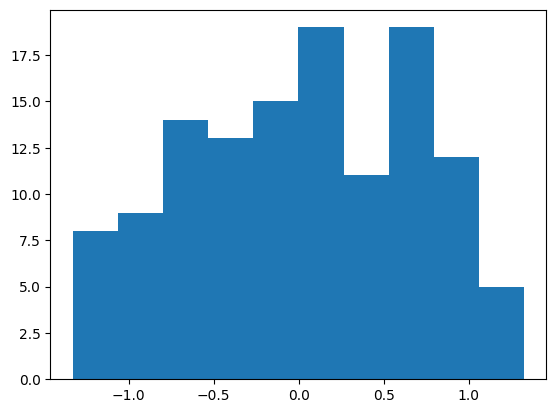

In [204]:
plt.hist(reg1 - y_test)

In [205]:
score1 = r2_score(y_test, reg1)
score2 = mean_absolute_error(y_test, reg1)
score3 = root_mean_squared_error(y_test, reg1)
print(score1)
print(score2)
print(score3)

0.5832539964611807
0.5666531062638723
0.6696024460596932
